In [5]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

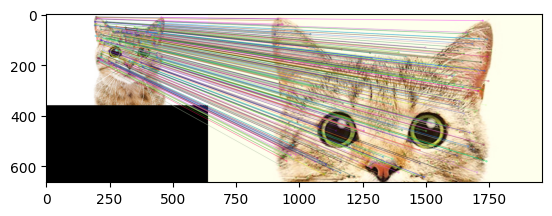

In [10]:
img1 = cv2.imread('kucing.jpg')
img2 = cv2.imread('kucing2.jpg')
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Menggunakan detector SIFT (openCv terbaru jadi memakai SHIFT langsung)
sift = cv2.SIFT_create()

# Mencari Keypoint dengan SIFT
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

# Melakukan Matching dari hasil deteksi keypoints menggunakan BruteForce Matcher
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Uji rasio matching sederhana
good = []
for m, n in matches:
    if m.distance < 0.5 * n.distance:
        good.append(m)

# Menggambar hasil match pada gambar baru (IMG3)
img3 = cv2.drawMatches(img1, kp1, img2, kp2, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Tampilkan gambar menggunakan Matplotlib
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.show()
